# 1. Objective

To model zero-truncated count data, i.e., data that has been censored at zero for some reason. In an ideal scenario, zeros should not be there in the response variable.

# 2. Adjust for zeros

Given that the response variable cannot be zero, zero-truncated Poisson or Negative Binomial models should be adjusted for the probability of observing zero for these distributions. So, we compute $P(y_i = 0)$ for both these distributions and divide the likelihood with this probability.

There are two packages in R - `MASS`, `VGAM` and `glmmTMB` that can handle such data.

## 2.1. Base models

Here is an example where the response is the number of days a snake lies on the road, unnoticed. By definition, this variable cannot be zero. However, when modeled as a Poisson or negative binomial, we are not excluding the probability of a 0. This makes this a zero-truncated model and needs to be corrected.

First, we fit a base model ignoring the zero-truncation.

In [6]:
data_df = read.delim("data/Snakes.txt")

In [7]:
glimpse(data_df)

Observations: 130
Variables: 11
$ ID       <int> 2176, 2448, 2917, 2927, 2845, 2849, 2860, 2760, 2758, 2764, …
$ Road     <fct> EN114, EN114, EN114, EN114, EN114, EN114, EN114, EN114, EN11…
$ Month    <fct> Jul, Aug, Oct, Oct, Oct, Oct, Oct, Sep, Sep, Sep, Sep, Aug, …
$ Season   <fct> Summer, Summer, Autumn, Autumn, Autumn, Autumn, Autumn, Autu…
$ N_days   <int> 4, 1, 4, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 1, 3, 2, 1, …
$ Species  <fct> Coluberhippocrepis, Elaphescalaris, Elaphescalaris, Elaphesc…
$ Road_Loc <fct> L, L, L, L, L, L, L, L, L, L, L, L, L, L, L, L, L, L, L, L, …
$ Size_cm  <int> 115, 150, 150, 150, 150, 150, 150, 150, 150, 150, 45, 170, 1…
$ PDayRain <dbl> 0.75, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, …
$ Tot_Rain <dbl> 15.0, 0.0, 40.2, 35.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.…
$ Temp_avg <dbl> 24.60, 27.40, 19.10, 17.80, 22.30, 22.30, 19.70, 19.90, 19.4…


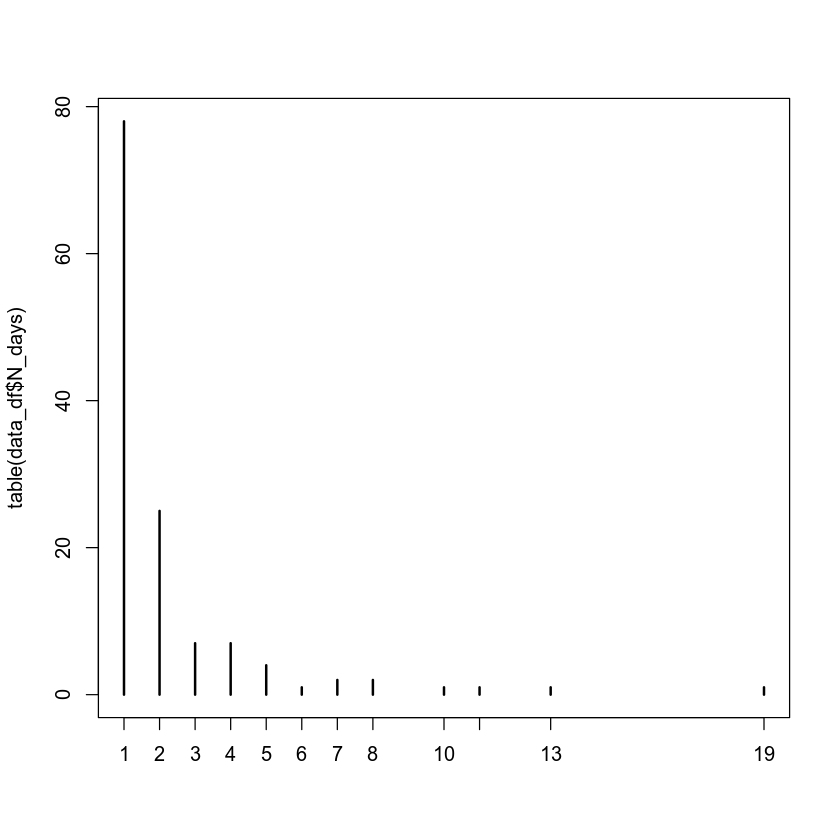

In [10]:
plot(table(data_df$N_days))

In [11]:
summary(data_df)

       ID                  Road        Month       Season       N_days    
 Min.   : 688   EN114        :38   Oct    :31   Autumn:51   Min.   : 1.0  
 1st Qu.:1407   EN370_EN114_4:50   May    :28   Spring:57   1st Qu.: 1.0  
 Median :2250   EN4          :42   Jun    :18   Summer:22   Median : 1.0  
 Mean   :2235                      Sep    :18               Mean   : 2.2  
 3rd Qu.:2874                      Jul    : 9               3rd Qu.: 2.0  
 Max.   :4161                      Nov    : 9               Max.   :19.0  
                                   (Other):17                             
                    Species   Road_Loc    Size_cm         PDayRain     
 Coluberhippocrepis     : 9   L:83     Min.   : 45.0   Min.   :0.0000  
 Coronellagirondica     : 5   V:47     1st Qu.:150.0   1st Qu.:0.0000  
 Elaphescalaris         :82            Median :150.0   Median :0.0000  
 Macroprotodoncucullatus: 5            Mean   :144.9   Mean   :0.3663  
 Malpolonmonspessulanus :29            3

Note that N_days cannot be zero.

Start with all fixed effects included

In [20]:
nb_model1 = MASS::glm.nb(N_days ~ Size_cm + PDayRain + Tot_Rain +
                         Road + Road_Loc + Size_cm:PDayRain + Size_cm:Tot_Rain + 
                         Size_cm:Road + Size_cm:Road_Loc + PDayRain:Tot_Rain + 
                         PDayRain:Road + PDayRain:Road_Loc + Tot_Rain:Road,
                         data = data_df)

In [23]:
step(nb_model1)

Start:  AIC=464.74
N_days ~ Size_cm + PDayRain + Tot_Rain + Road + Road_Loc + Size_cm:PDayRain + 
    Size_cm:Tot_Rain + Size_cm:Road + Size_cm:Road_Loc + PDayRain:Tot_Rain + 
    PDayRain:Road + PDayRain:Road_Loc + Tot_Rain:Road

                    Df Deviance    AIC
- Size_cm:Road       2   86.381 461.50
- Tot_Rain:Road      2   86.555 461.67
- Size_cm:PDayRain   1   85.655 462.77
- Size_cm:Road_Loc   1   86.575 463.69
- PDayRain:Road      2   89.265 464.38
- PDayRain:Road_Loc  1   87.365 464.48
- Size_cm:Tot_Rain   1   87.610 464.73
<none>                   85.618 464.74
- PDayRain:Tot_Rain  1  107.439 484.56

Step:  AIC=461.49
N_days ~ Size_cm + PDayRain + Tot_Rain + Road + Road_Loc + Size_cm:PDayRain + 
    Size_cm:Tot_Rain + Size_cm:Road_Loc + PDayRain:Tot_Rain + 
    PDayRain:Road + PDayRain:Road_Loc + Tot_Rain:Road

                    Df Deviance    AIC
- Tot_Rain:Road      2   86.608 458.45
- Size_cm:PDayRain   1   85.666 459.51
- Size_cm:Road_Loc   1   86.234 460.08
- PDayR


Call:  MASS::glm.nb(formula = N_days ~ Size_cm + PDayRain + Tot_Rain + 
    Road_Loc + Size_cm:Tot_Rain + PDayRain:Tot_Rain, data = data_df, 
    init.theta = 7.396638857, link = log)

Coefficients:
      (Intercept)            Size_cm           PDayRain           Tot_Rain  
       -0.2467637          0.0042470         -0.0094688          0.1573289  
        Road_LocV   Size_cm:Tot_Rain  PDayRain:Tot_Rain  
        0.4390113         -0.0002756         -0.1059897  

Degrees of Freedom: 129 Total (i.e. Null);  123 Residual
Null Deviance:	    156.6 
Residual Deviance: 90.27 	AIC: 453.5

In [25]:
nb_model2 = MASS::glm.nb(N_days ~ PDayRain + Tot_Rain + Road_Loc +
                                  PDayRain:Tot_Rain,
                         data = data_df)

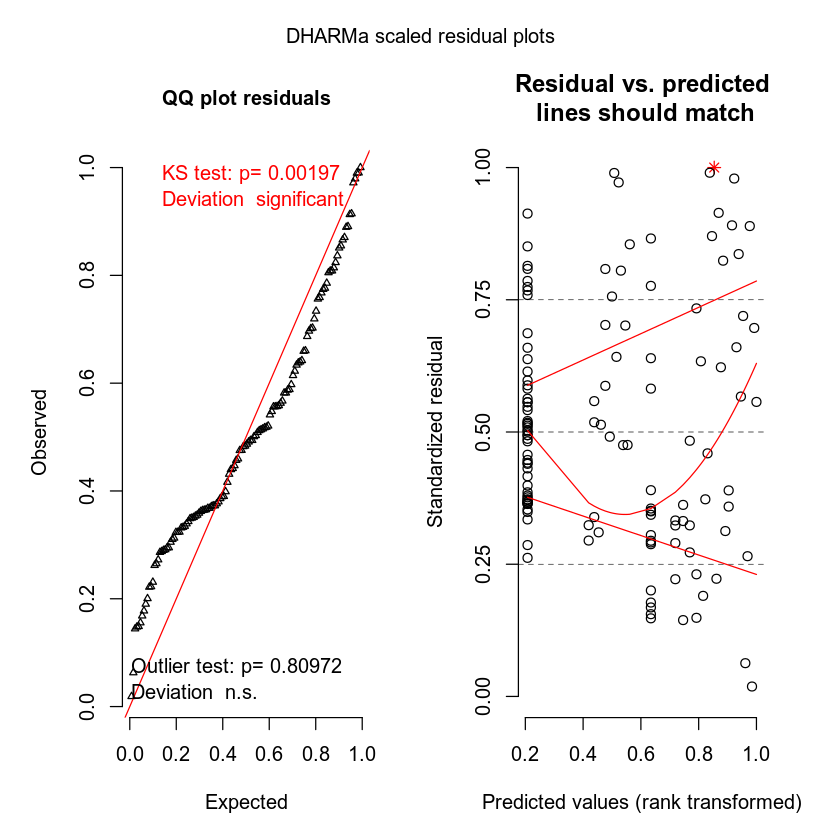

In [29]:
plot(simulateResiduals(nb_model2))

In [34]:
nb_model2a = glmmTMB(N_days ~ PDayRain + Tot_Rain + Road_Loc +
                              PDayRain:Tot_Rain,
                     family = "nbinom2",
                     data = data_df)

It seems you are diagnosing a glmmTBM model. There are still a few minor limitations associatd with this package. The most important is that glmmTMB doesn't implement an option to create unconditional predictions from the model, which means that predicted values (in res ~ pred) plots include the random effects. With strong random effects, this can sometimes create diagonal patterns from bottom left to top right in the res ~ pred plot. All other tests and plots should work as desired. Please see https://github.com/florianhartig/DHARMa/issues/16 for further details.


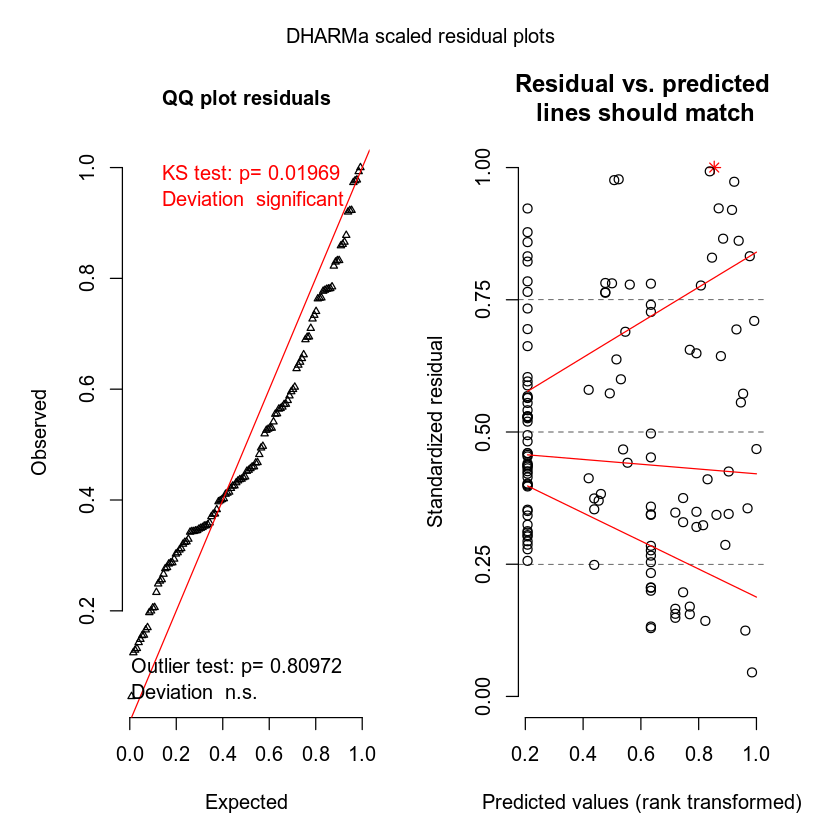

In [35]:
plot(simulateResiduals(nb_model2a))

In [36]:
summary(nb_model2)


Call:
MASS::glm.nb(formula = N_days ~ PDayRain + Tot_Rain + Road_Loc + 
    PDayRain:Tot_Rain, data = data_df, init.theta = 6.715410044, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0110  -0.5010  -0.3564   0.3856   5.0668  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.3653600  0.1120306   3.261  0.00111 ** 
PDayRain          -0.0008125  0.1925642  -0.004  0.99663    
Tot_Rain           0.1197748  0.0195451   6.128 8.89e-10 ***
Road_LocV          0.4487835  0.1480467   3.031  0.00243 ** 
PDayRain:Tot_Rain -0.1087838  0.0219258  -4.961 7.00e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(6.7154) family taken to be 1)

    Null deviance: 152.116  on 129  degrees of freedom
Residual deviance:  90.885  on 125  degrees of freedom
AIC: 452.76

Number of Fisher Scoring iterations: 1


              Theta:  6.72 
          Std. 

In [37]:
summary(nb_model2a)

 Family: nbinom2  ( log )
Formula:          N_days ~ PDayRain + Tot_Rain + Road_Loc + PDayRain:Tot_Rain
Data: data_df

     AIC      BIC   logLik deviance df.resid 
   452.8    470.0   -220.4    440.8      124 


Overdispersion parameter for nbinom2 family (): 6.72 

Conditional model:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.3653604  0.1128025   3.239  0.00120 ** 
PDayRain          -0.0008127  0.1974038  -0.004  0.99672    
Tot_Rain           0.1197748  0.0205540   5.827 5.63e-09 ***
Road_LocV          0.4487835  0.1475792   3.041  0.00236 ** 
PDayRain:Tot_Rain -0.1087837  0.0231364  -4.702 2.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

As the plots show, we cannot trust the regression results

## 2.2. Zero-truncated model

In [40]:
nb_trunc_model1 = glmmTMB(N_days ~ PDayRain + Tot_Rain + Road_Loc +
                                   PDayRain:Tot_Rain,
                          family = "truncated_nbinom2",
                          data = data_df)

It seems you are diagnosing a glmmTBM model. There are still a few minor limitations associatd with this package. The most important is that glmmTMB doesn't implement an option to create unconditional predictions from the model, which means that predicted values (in res ~ pred) plots include the random effects. With strong random effects, this can sometimes create diagonal patterns from bottom left to top right in the res ~ pred plot. All other tests and plots should work as desired. Please see https://github.com/florianhartig/DHARMa/issues/16 for further details.


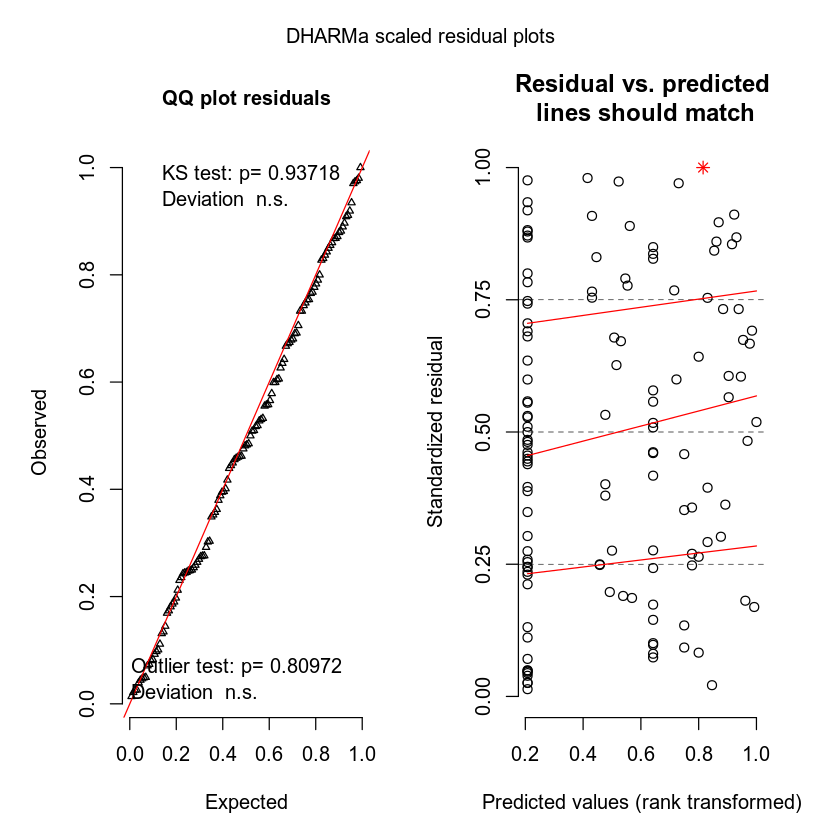

In [41]:
plot(simulateResiduals(nb_trunc_model1))

In [54]:
summary(nb_trunc_model1)

 Family: truncated_nbinom2  ( log )
Formula:          N_days ~ PDayRain + Tot_Rain + Road_Loc + PDayRain:Tot_Rain
Data: data_df

     AIC      BIC   logLik deviance df.resid 
   347.7    364.9   -167.8    335.7      124 


Overdispersion parameter for truncated_nbinom2 family (): 0.292 

Conditional model:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)       -1.57062    0.92710  -1.694  0.09024 . 
PDayRain           0.10916    0.50623   0.216  0.82927   
Tot_Rain           0.23921    0.07863   3.042  0.00235 **
Road_LocV          1.04457    0.34509   3.027  0.00247 **
PDayRain:Tot_Rain -0.21940    0.08258  -2.657  0.00789 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

As we can see, estimates and standard errors are very different once we account for the zero-truncatio

# R environment

In [28]:
library(tidyverse)
library(glmmTMB)
library(DHARMa)

Registered S3 method overwritten by 'DHARMa':
  method        from   
  refit.glmmTMB glmmTMB


In [4]:
setwd("~/mixed-effects-models")

In [43]:
install.packages("VGAM")

Installing package into ‘/home/pavan_g/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


In [5]:
print(sessionInfo())

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] glmmTMB_0.2.3   forcats_0.4.0   stringr_1.4.0   dplyr_0.8.0.1  
 [5] purrr_0.3.2     readr_1.3.1     tidyr_0.8.3     tibble_2.1.1   
 [9] ggplot2_3.1.1   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3        tidyselect_0.2.5    TMB_1.7.15         
 [4] repr_1.0.0          splines_3.6.1      